<h1 align="center">Projet STI: Séparation aveugles des sources</h1>
<h1 align="center">Réalisée par:</h1>
<h1 align="center">DIEYE Souleymane</h1>
<h1 align="center">NDZAMBA Louis Gildas</h1>




<h2><font color="red">Question 1 : </h2>

Soient 2 signaux aléatiores $X_t = (X_1(t),...,X_n(t))~et~ Y_t = (Y_1(t),...,Y_n(t)) $ de distribution respective $f_{X_t} ~ et ~ f_{Y_t}$.

On dit que $X_t$ et $Y_t$ sont indépendantes si et seulement si la densité du couple $(X_t, Y_t)$ est égale aux produits des densités de $X_t$ et $Y_T$

$$X_t \bot Y_t  \iff f_{X_t,Y_t} = f_{X_t}.f_{Y_t}$$

On dit que $X_t$ et $Y_t$ sont non corrélées si et seulement si  $cov(X_t,Y_t) = 0 $

Par définition, on a :

$$cov(X_t,Y_t) = E[(X_t-E[X_t]).(Y_t-E[Y_t])^T]$$

<h2><font color="red">Question 2 : </h2>

<p>Soit l'équation: $$x = A.s$$</p>
<p>Supposons que l'on ait W tel que: $$W.A = I_n$$ </p>
<p>dans ce cas, A est inversible car $$ det(A.W) = det(A) \times det(W) = det(I_n) = 1 $$ </p>

et $$ W = A^{-1} $$

De ce fait: $$ X = A.s \leftrightarrow s = A^{-1}.X $$

d'óu $$s = W.X$$

<h2><font color="red">Question 3 : </h2>

Lorsque le nombre de capteurs m est inférieur au nombre de signaux n on se retrouve avec un système linéaire comportant m équations á n inconnues et comme le nombre d'équations est inférieur aux nombres de variables, il devient difficile de résoudre ce systéme.

<h2><font color="red">Question 4 : </h2>

<p>On a: $$E[s_i] = \int_R s_i.\frac{1}{2\sqrt{3}} \, \mathrm ds_i $$</p> 
<p> $$= \int_{-\sqrt{3}}^{\sqrt{3}} s_i.\frac{1}{2\sqrt{3}} \, \mathrm ds_i$$</p> 
<p>$$ = [\frac{1}{4\sqrt{3}}.s_i^2]_{-\sqrt{3}}^{\sqrt{3}} = 0 $$</p>

Donc: $$ Var[s_i] = E[s_i^2]$$

<p> $$ = \int_R s_i^2.\frac{1}{2\sqrt{3}} \, \mathrm ds_i$$ </p>
<p> $$ = \int_{-\sqrt{3}}^{\sqrt{3}} s_i^2.\frac{1}{2\sqrt{3}} \, \mathrm ds_i $$ </p>
<p> $$ = [\frac{1}{6\sqrt{3}}.s_i^3]_{-\sqrt{3}}^{\sqrt{3}} = 1 $$ </p>

D'óu les signaux sont de variances unités.

<h2><font color="red">Question 5 : </h2>

## Traduction Indépendance
<p> On pourra observer ci dessous que les points de $s_1$ et de $s_2$ sont réparties aléatoirement dans notre graphe, la connaissance de la valeur de l'une ne nous donne aucune information sur l'autre</p>

In [2]:
%pylab inline
pylab.rcParams['figure.figsize']=(8.0,8.0)
from scipy import signal
import scipy.stats
import scipy.io as io

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'s2')

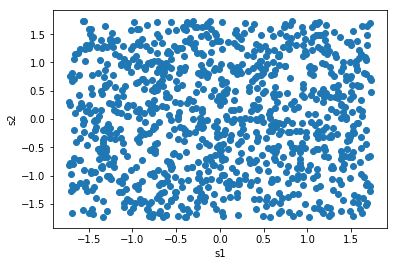

In [3]:
s1 = random.uniform(-sqrt(3),sqrt(3) ,1000)
s2 = random.uniform(-sqrt(3),sqrt(3) ,1000)

scatter(s1,s2)
xlabel('s1')
ylabel('s2')


<h2><font color="red">Question 6: </h2>

Text(0,0.5,'x2')

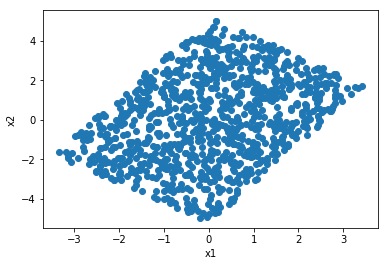

In [4]:
s = [s1,s2]
A = [[1,1],[-1,2]]
x = dot(A,s)
x1 = x[0]
x2 = x[1]

figure(2)
scatter(x1,x2)
xlabel('x1')
ylabel('x2')

## Indépendance de $X_1$ et $X_2$

<p> on pourra constater que la valeur choisie de $x_1$ aura un effet sur la valeur de $x_2$ et donc sur celui du couple $(x_1;x_2)$, ce dernier n'est pas uniformément réparti sur le rectangle (voir figure 2 ci-dessus) </p>

<h2><font color="red">Question 7: </h2>

Comme on a pu le constater á la question précédente, notre transformation correspond á une similitude directe, la composé d'une rotation et d'une homothétie.

Afin d'estimer les coefficients de notre matrice de transformation, on va chercher les coordonnées de (AB) et (AC) qui correspondent á:

<p>A ( min($x_1$) ; $x_2$|$x_1$ = min($x_1$) )</p>
<p>B ( $x_1$|$x_2$ = min($x_2$) ; min($x_2$) ) </p>
<p>C ( $x_1$|$x_2$ = max($x_2$) ; max($x_2$) ) </p>

[ 3.15520136 -3.33198423]
[3.50767531 6.63648736]


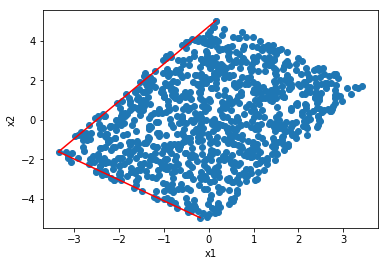

In [5]:
a = ( x1.min() , x2[np.where(x1 == x1.min())[0][0]] )
b = (x1[np.where(x2 == x2.min())[0][0]]  ,x2.min())
c=  (x1[np.where(x2 == x2.max())[0][0]]  ,x2.max())
AB = array([b[0]-a[0], b[1]-a[1]])
AC = array([c[0]-a[0], c[1]-a[1]])
print(AB)
print(AC)
A = array([AB,AC]).T/(2*sqrt(3))
W = np.linalg.inv(A)
S = dot(W,x)
scatter(x1,x2)
xlabel('x1')
ylabel('x2')
plot([a[0] , b[0]],[a[1] , b[1]],'r')
plot([a[0] , c[0]],[a[1] , c[1]],'r')

## Calcul de W et de $S_1$ et $S_2$

On a: $W$ = $A^{-1}$

<p> Donc: \begin{equation*} W_{estimé} =  \begin{bmatrix}
                                                        0.72201164 & -0.34659075 \\
                                                        0.36029564 &  0.34026395 
                                          \end{bmatrix}
            \end{equation*}
</p>
<p> Et comme  \begin{equation} S = A^{-1} \times X
               \end{equation}
</p>
    <p> Alors on obtient le plot de S suivant : </p> 


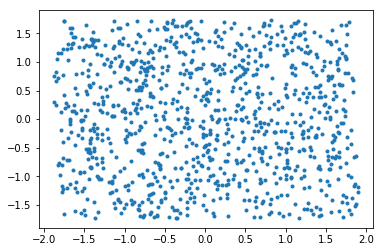

In [6]:
plot(S[0],s[1],'.')

## Limitation
- En utilisant cette technique on aura des erreurs d'approximations vu que l'on prend une valeur approximative de A
- En cas d'utilisation d'un nombre important de signaux indépendants, l'approximation de A sera trés lourd voir impossible
- Cette méthode est limité, elle depend fortement de la loi, par exemple si on utilisait la méme loi uniforme sur $]- \infty, +\infty[$,   il serait difficile de trouver notre matrice A

<h2><font color="red">Question 8: </h2>

<p> Cette fois-ci, on considére que $S_1$ et $S_2$ ont des densités de probabilité gaussienne de variance unité

Text(0,0.5,'s2')

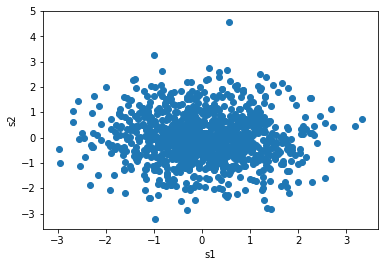

In [7]:
s1g = random.normal(0,1,1000)
s2g= random.normal(0,1,1000)

scatter(s1g,s2g)
xlabel('s1')
ylabel('s2')

Text(0,0.5,'x2')

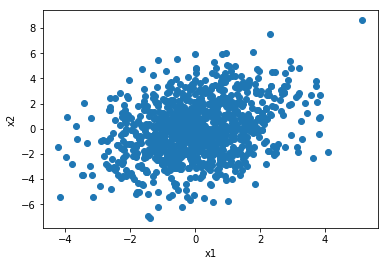

In [8]:
A = [[1,1],[-1,2]]
sg = [s1g,s2g]
xg = dot(A,sg)
x1g = xg[0]
x2g = xg[1]

scatter(x1g,x2g)
xlabel('x1')
ylabel('x2')


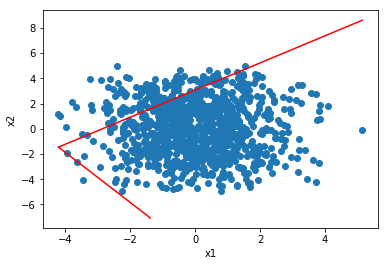

In [9]:
a = ( x1g.min() , x2g[np.where(x1g == x1g.min())[0][0]] )
b = (x1g[np.where(x2g == x2g.min())[0][0]]  ,x2g.min())
c=  (x1g[np.where(x2g == x2g.max())[0][0]]  ,x2g.max())
AB = array([b[0]-a[0], b[1]-a[1]])
AC = array([c[0]-a[0], c[1]-a[1]])

A = array([AB,AC]).T/(2*sqrt(3))

scatter(x1g,x2)
xlabel('x1')
ylabel('x2')
plot([a[0] , b[0]],[a[1] , b[1]],'r')
plot([a[0] , c[0]],[a[1] , c[1]],'r')


Nous remarquons une complexité pour retrouver les coefficients
de A, Cette technique n'est donc pas exploitable pour des siganux gaussiens.

<h2><font color="red">Question 9 : </h2>

<p>On se place dans le cas simple, c'est à dire d'une loi uniforme U[0,1].</p>
<p>Soit $$S_n = \sum_{k=1}^n U_k $$</p>
Pour n = 2, on a $$f_{S_2}(x) =   \begin{equation}
  \left\{
    \begin{split}
    {x}~ & \mbox{si }~~~0≤x≤1\\
    {2-x} ~& \mbox{si }~~~1≤x≤2
    \end{split}
  \right.
\end{equation}$$

Pour n = 3, on a $$f_{S_3}(x) =   \begin{equation}
  \left\{
    \begin{split}
    \frac{1}{2}x^2~si~~~ 0≤x≤1\\
    \frac{1}{2}(-2x^2+6x-3~ si~~~1≤x≤2\\
    \frac{1}{2}(x^2-6x+9)~ si~~~ 2≤x≤3
    \end{split}
  \right.
\end{equation}$$

Pour n = 4, on a $$f_{S_3}(x) =   \begin{equation}
  \left\{
    \begin{split}
    \frac{1}{6}x^3~si~~~0≤x≤1\\
    \frac{1}{6}(-3x^3+12x^2-12x+4)~ si~~~ 1≤x≤2\\
    \frac{1}{6}(3x^3-24x^2+60x-44)~ si~~~ 2≤x≤3\\
    \frac{1}{6}(-x^3+12x^2-48x+64)~ si~~~ 3≤x≤4\\
    \end{split}
  \right.
\end{equation}$$

In [10]:
def F_s1(x_list):
    result =[]
    for x in x_list:
    
        if x<=1 and x>=0:
            result.append(1)
        else:
            result.append(0)
    return result

def F_s2(x_list):    
    result_x2 =[] 
    for x in x_list[:]:
        if x<=1 and x>=0:
            result_x2.append(x)
        
        elif x<=2 and x>=1:
            result_x2.append(2-x)
        else :
            result_x2.append(0)
            
    return result_x2

def F_s3(x_list):
    result_x3 =[] 
    for x in x_list[:]:
        if x<1 and x>=0:
            result_x3.append(0.5*(x**2))
        elif x<2 and x>=1:
            result_x3.append(0.5*(-2*(x**2) + 6*x -3))
        elif x<=3 and x>=2:
            result_x3.append(0.5*((x**2) - 6*x +9))
        else : 
            result_x3.append(0)
    return result_x3

def F_s4(x_list):
    result_x4 =[] 
    for x in x_list:
        
        if x<1 and x>=0:
            tmp =(1.0/6)*(x**3)
            result_x4.append(tmp)            
        elif x<=2 and x>=1:
            tmp = (1.0/6)*(-3*(x**3)+12*(x**2) - 12*x +4)
            result_x4.append(tmp)            
        elif x<=3 and x>=2:
            result_x4.append((1.0/6)*(3*(x**3)-24*(x**2) +60*x -44))            
        elif x<=4 and x>=3:
            result_x4.append((1.0/6)*(-(x**3)+ 12*(x**2) -48*x +64))
        else :
            result_x4.append(0)
    return result_x4


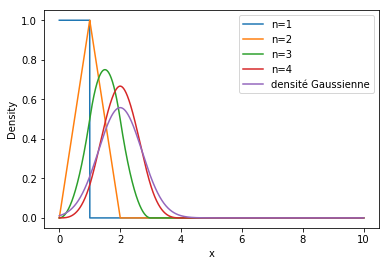

In [11]:
x = linspace(0,10,10000)
plot(x,F_s1(x),label="n=1")
plot(x,F_s2(x),label="n=2")
plot(x,F_s3(x),label="n=3")
plot(x,F_s4(x),label="n=4")
plot(x,scipy.stats.norm.pdf(x, 2, 0.715),label="densité Gaussienne")
xlabel('x')
ylabel('Density')
legend()

<p> <FONT size="3pt">On remarque donc que plus on additionne des variables aléatoires uniformes, plus on se rapproche d'une variable aléatoire normale de même variance, ce qui concorde avec le théorème centrale limite qui implique ce résultat.</FONT></p>
<p> <FONT size="3pt">Soit la V.A     $S_n = \frac{s_1 + s_2 + ... + s_2}{\sqrt{n}}$ où $(s_1,s_2,...,s_n)$ sont des variables aléatoires indépendantes et identiquement distribuées. Alors la v.a $S_n$ converge en loi vers la loi normale centrée réduite quand n tend vers l'infini.</FONT></p>

<h2><font color="red">Question 10 : </h2>

<p><FONT size="3pt"> Soit Y une variable aléatoire gaussienne. Y a donc pour densité : 
$$ f_{y}(y) = \frac{1}{\sqrt{2\pi \sigma}}.exp(\frac{-x^2}{2\sigma^2})$$  </p></FONT>
<p>On a: $E(y^4) = \frac{1}{\sqrt{2\pi \sigma}} \int\limits_{\mathbf{R}} y^4.exp(\frac{-y^2}{2\sigma^2})\, \mathrm{d}y  $</p>
<p>par une integration par partie, on a :</p>
<p> $E(y^4) = \frac{1}{\sqrt{2\pi \sigma}}.([-\sigma^3y^3 exp(\frac{-y^2}{2\sigma^2})] + 3\sigma^2 \int\limits_{\mathbf{R}} y^2.exp(\frac{-y^2}{2\sigma^2})\, \mathrm{d}y) $</p>

On a: $y^3 exp(\frac{-y^2}{2\sigma^2})\xrightarrow{+ -\infty }  0 $

alors
$E(y^4)) =  \frac{3\sigma^2}{\sqrt{2\pi \sigma}} \int\limits_{\mathbf{R}} y^2.exp(\frac{-y^2}{2\sigma^2})\, \mathrm{d}y) = 3\sigma^2var(y) $
<p>D'où $E(y^4)) = 3\sigma^4 $</p>
<p> Donc $$ Kurt(y) = 0 $$</p>

<h2><font color="red">Question 11 : </h2>

<p>Comme E est orthogonale et D diagonale, alors on a:</p>
<p>$$EE^T = E^TE=I_n$$</p>
<p>$$(D^{-1/2})^T = D^{-1/2}$$</p>
<p>Donc : $$E[\tilde x \tilde x^T] =E[E \times D^{-1/2} \times E^Tx.x^TE \times (D^{-1/2})^T \times E^T]$$</p>
$$E[\tilde x \tilde x^T] =E(D^{-1/2})E^TE[x.x^T]E(D^{-1/2})^TE^T$$
comme $$ E[x.x^T] = EDE^T $$
alors
$$E[\tilde x \tilde x^T] =E(D^{-1/2})E^T.EDE^T.E(D^{-1/2})^TE^T$$
<p>D'où</p>$$E[\tilde x \tilde x^T] =EE^T=I_n$$

<h2><font color="red">Question 12 : </h2>

<p> Soit $$G(y) = log(cosh(y))$$</p>
On a: 
$$g(y) = G'(y)$$
$$= \frac{cosh'(y)}{cosh(y)}$$
$$= \frac{sinh(y)}{cosh(y)}$$
$$g(y) = tanh(y)$$
alors on a:
$$ g'(y) = G^{''}(y)$$
$$= tanh'(y) $$
$$= \frac{1}{cosh^2(y)}$$
d'óu 
$$ g'(y) = 1-tanh^{2}(y)$$

<h2><font color="red">Question 13 : </h2>

In [12]:
def ICA(x):
    
    counter = 0   
    prod = dot(x,x.T)/len(x[1])    
    Vp,E=eig(prod)   
    A = dot(dot(E , diag(1.0/sqrt(real(Vp)))), E.T)
    x_tilde   = dot(A , x)

    w = rand(len(x_tilde))
    w  = w/norm(w) 
    y = dot(w,x_tilde)
    
    while counter < 100:
        
        w = mean(x_tilde*tanh(y),axis=1)-mean(1/((cosh(y))**2))*w
        w    = w/norm(w)                
        y  = dot(w,x_tilde)          
        counter += 1

    s1 = dot(w,x_tilde)
    s2 = dot([-w[1],w[0]],x_tilde) 

    return s1, s2


Text(0.5,1,'s2 estimé')

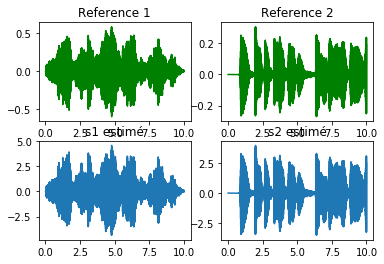

In [13]:
# Read reference signal files
reference_1 = np.fromfile("Ref_1.txt", dtype=numpy.float64)
reference_2 = np.fromfile("Ref_2.txt", dtype=numpy.float64)

# read input files
input_1  = np.fromfile("In_1.txt", dtype=numpy.float64)
input_2  = np.fromfile("In_2.txt", dtype=numpy.float64)

x = np.array([input_1,input_2])
s1, s2 = ICA(x)

t = linspace(0,10,len(x[0]))

subplot(221)
plot(t,reference_1,'g')
title('Reference 1')  
subplot(222)
plot(t,reference_2,'g')
title('Reference 2')
subplot(223)
plot(t,s1)
title('s1 estimé')
subplot(224)
plot(t,s2)
title('s2 estimé')

On pourra remarquer que pour différente valeur de $w$ initial, on aura des résultats différentes

<h2><font color="red">Question 14 : </h2>

In [14]:
% pylab inline
import numpy as np
import struct

def source_separation_ICA(v_ica_in_1, v_ica_in_2,  d_fact_ech=1):
    
    nb             = len(v_ica_in_1)
    nb_iter        = 10**3
    m_melange      = array([v_ica_in_1 , v_ica_in_2])
    
    m_melange[0,:] = m_melange[0,:] - mean(m_melange[0,:])
    m_melange[1,:] = m_melange[1,:] - mean(m_melange[0,:])

    # whitening
    C    = dot(m_melange,m_melange.T)/nb
    d,V  = eig(C)
    M    = V @ diag(1/sqrt(real(d))) @ V.T
    m_xw = M @ m_melange
    
    # Search of one independant component
    v_w = rand(2)         # initialization of separation vector for first source
    v_w  = v_w/norm(v_w) 
    v_y1 = dot(v_w,m_xw)  # Initialization of estimated signals
    
    for i in range(nb_iter):           # estimation of signal entropy
        v_y    = tanh(v_y1)            #g(w^Tx)
        v_z    = 1/((cosh(v_y1))**2);  #g'(w^Tx)
        v_w[0] = mean(v_y*(m_xw[0,:]))-mean(v_z)*v_w[0];  #E[xg(w^Tx)]-E[g'(w^Tx)]w
        v_w[1] = mean(v_y*(m_xw[1,:]))-mean(v_z)*v_w[1];
        v_w    = v_w/norm(v_w);
        v_y1   = dot(v_w,m_xw)#v_w*m_xw.T;

    # search of second line seconde ligne.
    v_z = [-v_w[1], v_w[0]]
    m_b = [v_w, v_z]
        
    m_signal_estime = dot(m_b,m_xw) # estaimated signals

    output_1 = (m_signal_estime[0, :]) * d_fact_ech
    output_2 = (m_signal_estime[1, :]) * d_fact_ech
    
    return output_1,output_2

Populating the interactive namespace from numpy and matplotlib


In [15]:
# read input files
input_1  = np.fromfile("In_1.txt", dtype=numpy.float64)
input_2  = np.fromfile("In_2.txt", dtype=numpy.float64)

# Perform sources separation
#output_1, output_2 = source_separation_SOBI(input_1, input_2)
output_1, output_2 = source_separation_ICA(input_1, input_2)

# Save outputs in files
file_output_1 = open("ICA_Out_1.txt","wb")
file_output_2 = open("ICA_Out_2.txt","wb")
file_output_1.write(struct.pack('d'*len(output_1),*output_1)) # write vector after binary conversion
file_output_2.write(struct.pack('d'*len(output_2),*output_2))
file_output_1.close()
file_output_2.close()

# Read reference signal files
reference_1 = np.fromfile("Ref_1.txt", dtype=numpy.float64)
reference_2 = np.fromfile("Ref_2.txt", dtype=numpy.float64)

# Evaluate performance indices
cos_1   =  inner(reference_1,output_1)/norm(reference_1)/norm(output_1);
cos_2   =  inner(reference_2,output_2)/norm(reference_2)/norm(output_2);
err_1   = 10*(log(1-(cos_1**2))/log(10));
err_2   = 10*(log(1-(cos_2**2))/log(10));
print("Error index 1 (dB) = {:f}".format(err_1));
print("Error index 2 (dB) = {:f}\n".format(err_2));
print("cos(input_1, output_1) = {:f}".format(cos_1));
print("cos(input_2, output_2) = {:f}\n".format(cos_2));

Error index 1 (dB) = -57.155704
Error index 2 (dB) = -57.155704

cos(input_1, output_1) = -0.999999
cos(input_2, output_2) = 0.999999



Text(0.5,1,'Signal estime 1')

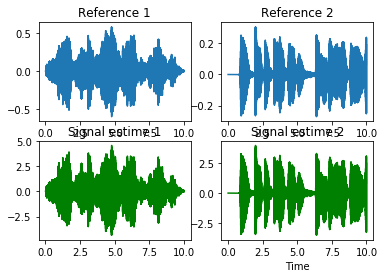

In [16]:
subplot(221)
plot(t,reference_1)
title('Reference 1')  
subplot(222)
plot(t,reference_2)
title('Reference 2') 
subplot(224)
plot(t,output_2,'g')
xlabel('Time')
title('Signal estime 2')  
subplot(223)
plot(t,output_1,'g')
title('Signal estime 1') 

<h2><font color="red">Question 15 : </h2>

In [17]:
def correlation(xi,xj):
    R = np.outer(xi, xj)
    return R

def normalizedTrace(R):
    return (trace(R)/(len(R)))

def off(R):
    return ((sum(R)-trace(R)) / ((len(R)-1)*len(R)))

In [18]:
def SOBI(step, x) :
    length = len(x[0])//step
    Cx1x1 = zeros((step, step))
    Cx1x2 = zeros((step, step))
    Cx2x2 = zeros((step, step))
    
    for i in range(length):
        Cx1x1 =Cx1x1+ correlation(x[0][i*step : (i+1)*step],x[0][i*step : (i+1)*step])
        Cx2x2 =Cx2x2+ correlation(x[1][i*step : (i+1)*step],x[1][i*step : (i+1)*step])
        Cx1x2 =Cx1x2+ correlation(x[0][i*step : (i+1)*step],x[1][i*step : (i+1)*step])
        
    Cx1x1 = Cx1x1/length
    Cx2x2 = Cx2x2/length
    Cx1x2 = Cx1x2/length
    
    T1 = normalizedTrace(Cx1x1)
    T2 = normalizedTrace(Cx2x2)
    T12 = normalizedTrace(Cx1x2)
    
   ## print(T1,'\n',T2 ,'\n', T12)
    

    F1 = off(Cx1x1)
    F2 = off(Cx2x2)
    F12 =off(Cx1x2)
   
   ## print(F1,'\n',F2 ,'\n', F12)


    α = (2*F12*T12) -(F1*T2 + F2*T1)
    β = 2*((T12**2) -(T1*T2))
    γ= sqrt(((F1*T2 -F2*T1)**2) + (4*(F12*T2 - T12*F2)*(F12*T1 - T12*F1)))

   ## print(α,'\n',β ,'\n', γ)
    d1 = α - γ
    d2 = α + γ

    A_chapo = array([[(β*F1 - T1*d1), (β*F12 -T12*d2)],[(β*F12 -T12*d1),(β*F2-T2*d2)]])
    print(A)
    W =inv(A_chapo) 
    s=dot(W,x)
    
    return s

In [19]:
result = SOBI(18, x)

[[ 0.81619579  2.70113441]
 [-1.62062217  2.90416595]]


[[ 0.81619579  2.70113441]
 [-1.62062217  2.90416595]]


Text(0.5,1,'s2 estimé')

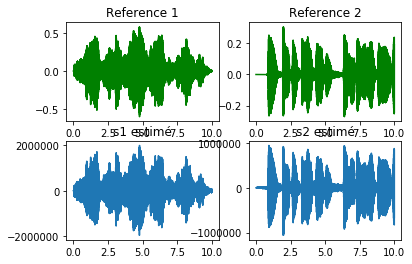

In [20]:
s1, s2 = SOBI(100, x)

t = linspace(0,10,len(x[0]))

subplot(221)
plot(t,reference_1,'g')
title('Reference 1')  
subplot(222)
plot(t,reference_2,'g')
title('Reference 2')
subplot(223)
plot(t,s1)
title('s1 estimé')
subplot(224)
plot(t,s2)
title('s2 estimé')

## Audition signal

In [21]:
from IPython.display import Audio
Audio(result[0], rate=44100)

In [22]:
Audio(result[1], rate=44100)

## évaluation des Performances et Comparaison

### Critére d'évaluation

In [23]:
def NMSE(s,s_chapo):
    return 1.0 - (1.0 * dot(s,s_chapo) / (norm(s)*norm(s_chapo)))**2

def NMSE_dB(s, s_chapo):
    return 10.0*log(NMSE(s.T,s_chapo))/log(10)

In [24]:
s_ref = np.array([reference_1, reference_2])
s_ICA = np.array(ICA(x))
s_SOBI = np.array(SOBI(10, x))

[[ 0.81619579  2.70113441]
 [-1.62062217  2.90416595]]


In [25]:
a = NMSE(s_ref[0], s_ICA[0])
print(NMSE_dB(s_ref[0], s_ICA[0]))

-57.15570439364783


In [26]:
epsilon_ICA_s1 = NMSE_dB(s_ref[0], s_ICA[0])
epsilon_SOBI_s1 = NMSE_dB(s_ref[0], s_SOBI[0])
epsilon_ICA_s2 = NMSE_dB(s_ref[1], s_ICA[1])
epsilon_SOBI_s2 = NMSE_dB(s_ref[1], s_SOBI[1])

In [27]:
print("l' erreur en dB pour s1 vaut:", epsilon_ICA_s1, "pour ICA et", epsilon_SOBI_s1, "pour SOBI")
print("       ")
print("l' erreur en dB pour s2 vaut:", epsilon_ICA_s2, "pour ICA et", epsilon_SOBI_s2, "pour SOBI")

l' erreur en dB pour s1 vaut: -57.15570439364783 pour ICA et -76.63165270998182 pour SOBI
       
l' erreur en dB pour s2 vaut: -57.155704392144976 pour ICA et -76.63165279878322 pour SOBI


## Conclusion

On pourra dire que dans notre cas SOBI fournit de meilleure résultat que ICA, ce qui pourrait s'expliquer par le fait que pour SOBI on s'arréte aux statistiques d'ordre 2 (moins d'erreur cumulé aprés itération)

## Algorithm SOBI EN C

Aprés avoir compiler notre code C on pourra récupérer nos 2 signaux séparés, correspondant respectivement á : "outputSOBI_S1.txt" et "outputSOBI_S2.txt" et vérifier si on a des résultat cohérent avec le code en C

l' erreur en dB pour s1 vaut: -89.1787083192569 sous C
l' erreur en dB pour s1 vaut: -89.17870991559707 sous C


Text(0.5,1,'Signaux s2 code C')

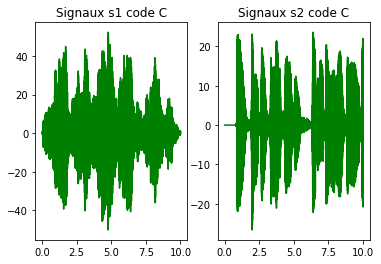

In [39]:
outputSOBI_S1  = np.fromfile("outputSOBI_S1.txt", dtype=numpy.float64)
outputSOBI_S2  = np.fromfile("outputSOBI_S2.txt", dtype=numpy.float64)

print("l' erreur en dB pour s1 vaut:", NMSE_dB(s_ref[0], outputSOBI_S1), "sous C")
print("l' erreur en dB pour s1 vaut:", NMSE_dB(s_ref[1], outputSOBI_S2), "sous C")

subplot(121)
plot(t,outputSOBI_S1,'g')
title('Signaux s1 code C')  
subplot(122)
plot(t,outputSOBI_S2,'g')
title('Signaux s2 code C')

on pourra remarquer que l'on a des résultats sous C similaires á ceux obtenus avec notre algorithme sous Python.